## From Data Visualization to Hypothesis Testing in Python: A Practical Approach using t-test (part 1)

You can visit my article on Medium where I give a thorough explanation of how to conduct t-test in this notebook. The link is here: https://medium.com/@miraismira/from-data-visualization-to-hypothesis-testing-in-python-t-test-part-1-1260ab651801

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data
df = pd.read_csv("StudentsPerformance_edit.csv")
df.head()

,gender,ethnicity,parents_edu,lunch,prep_course,math_score,read_score,write_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Checking data shape
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       1000 non-null   object
 1   ethnicity    1000 non-null   object
 2   parents_edu  1000 non-null   object
 3   lunch        1000 non-null   object
 4   prep_course  1000 non-null   object
 5   math_score   1000 non-null   int64 
 6   read_score   1000 non-null   int64 
 7   write_score  1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Gender and Math Scores

In [4]:
# Sampling the data

female_sample = df[df.gender=="female"].sample(n=40, random_state=123)
male_sample = df[df.gender=="male"].sample(n=40, random_state=123)

all_gender = pd.concat([female_sample, male_sample], ignore_index=True)

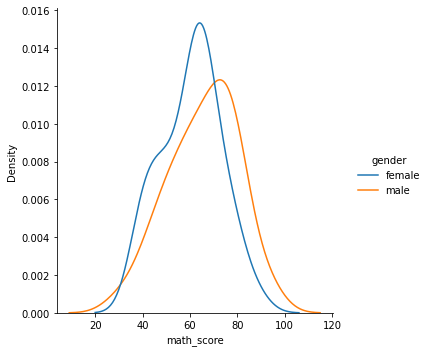

In [5]:
sns.displot(data= all_gender, x="math_score", hue="gender", kind="kde")

<AxesSubplot:xlabel='gender', ylabel='math_score'>

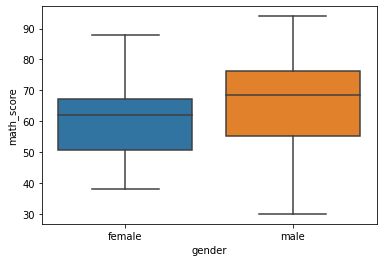

In [6]:
sns.boxplot(data=all_gender, x="gender", y="math_score")

<AxesSubplot:xlabel='gender', ylabel='math_score'>

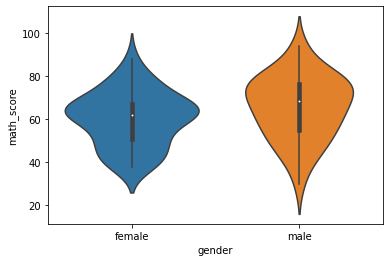

In [7]:
sns.violinplot(data=all_gender, x="gender", y="math_score")

In [8]:
print(female_sample["math_score"].mean(), female_sample["math_score"].std() )
print(male_sample["math_score"].mean(), male_sample["math_score"].std())

60.4 12.595888625119319
65.625 14.6579592450917


In [9]:
# Normality test
from scipy.stats import shapiro

print(shapiro(female_sample["math_score"]))
print(shapiro(male_sample["math_score"]))

ShapiroResult(statistic=0.9679790735244751, pvalue=0.3099881708621979)
ShapiroResult(statistic=0.9797645211219788, pvalue=0.6808052062988281)


In [10]:
# Equal variances test
from scipy.stats import levene

levene(female_sample["math_score"], male_sample["math_score"], center="mean")

LeveneResult(statistic=1.2528627162820796, pvalue=0.2664414737466875)

In [11]:
# the t-test

from scipy.stats import ttest_ind
ttest_ind(a=female_sample["math_score"], b=male_sample["math_score"],
          equal_var=True)

Ttest_indResult(statistic=-1.7098732045046205, pvalue=0.09126479954276928)

## Lunch and Math Scores

In [19]:
# Sampling the data

standard = df[df.lunch=="standard"].sample(n=40, random_state=123)
free = df[df.lunch=="free/reduced"].sample(n=40, random_state=123)

df_lunch = pd.concat([standard, free], ignore_index=True)

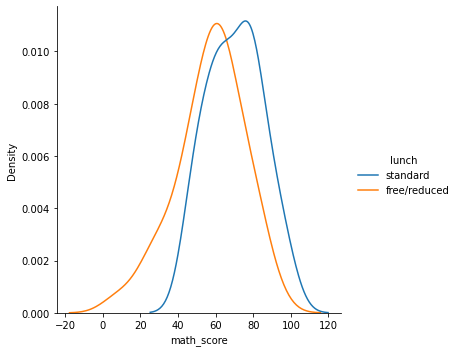

In [20]:
sns.displot(data=df_lunch, x="math_score", hue="lunch", kind="kde")

<AxesSubplot:xlabel='lunch', ylabel='math_score'>

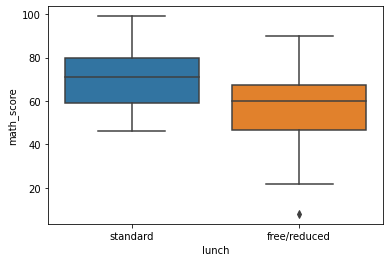

In [21]:
sns.boxplot(data=df_lunch, x="lunch", y="math_score")

<AxesSubplot:xlabel='lunch', ylabel='math_score'>

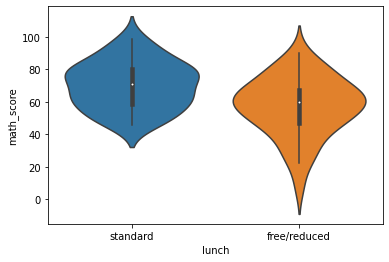

In [22]:
sns.violinplot(data=df_lunch, x="lunch", y="math_score")

In [26]:
print(standard["math_score"].mean(), standard["math_score"].std() )
print(free["math_score"].mean(), free["math_score"].std())

70.325 14.504442290341471
57.15 17.943715420082963


In [23]:
# Normality test
print(shapiro(standard["math_score"]))
print(shapiro(free["math_score"]))

ShapiroResult(statistic=0.9704917073249817, pvalue=0.3730013370513916)
ShapiroResult(statistic=0.9723243713378906, pvalue=0.425055593252182)


In [24]:
# Test for equal variances
levene(standard["math_score"], free["math_score"], center="mean")

LeveneResult(statistic=0.5757662440957513, pvalue=0.4502635015767411)

In [25]:
# t-test
ttest_ind(a=standard["math_score"], b=free["math_score"],
          equal_var=True)

Ttest_indResult(statistic=3.611433622974276, pvalue=0.0005365728667256182)